In [5]:
%run DataAnalysis.ipynb

In [281]:
cos_theta=pd.read_csv('data/angular/cos_theta.csv', sep=',',header=None).values
phi=pd.read_csv('data/angular/phi.csv', sep=',',header=None).values

cos_theta = cos_theta[::-1]

#normalize plots
cos_theta[:,1] /= np.sum(cos_theta[:,1] / 38)
phi[:,1] /= np.sum(phi[:,1] * 360 / 36)

#phi[:,0] -= 90

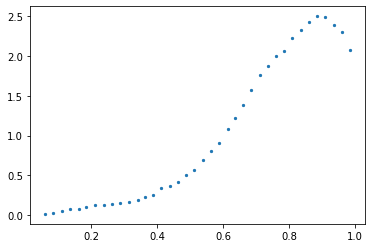

In [282]:
plt.scatter(cos_theta[:,0], cos_theta[:,1], s=5)

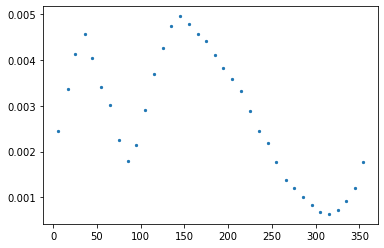

In [283]:
plt.scatter(phi[:,0], phi[:,1], s=5)

In [2]:
from scipy.interpolate import CubicSpline

def make_inverse_cdf(angles, bin_width):
    
    cdf_values = []
    for i in range(len(angles)):
        x = angles[:,0][i]
        y = 0
        for j in range(i+1):
            y += angles[:,1][j] * bin_width
        cdf_values.append((x,y))
    cdf_values = np.array(cdf_values)
    cdf_values[0][1] = 0
    cdf_values[-1][1] = 1
    
    return CubicSpline(cdf_values[:,1], cdf_values[:,0])


inverse_cdf_theta = make_inverse_cdf(cos_theta, 1/38)
inverse_cdf_phi = make_inverse_cdf(phi, 360 / 36)

NameError: name 'cos_theta' is not defined

In [243]:
inverse_cdf_phi(10)

array(-43260431.38930766)

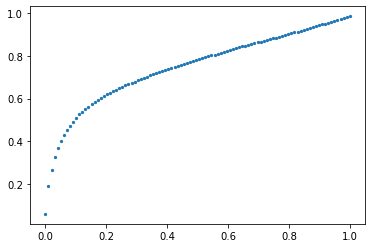

In [160]:
thetas = np.linspace(0,1,100)
plt.scatter(thetas, inverse_cdf_theta(thetas), s=5)

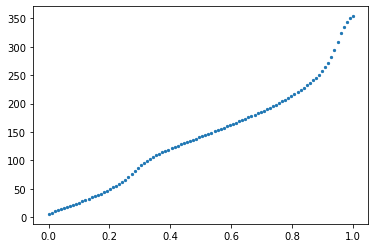

In [165]:
phis = np.linspace(0,1,100)
plt.scatter(phis, inverse_cdf_phi(phis), s=5)

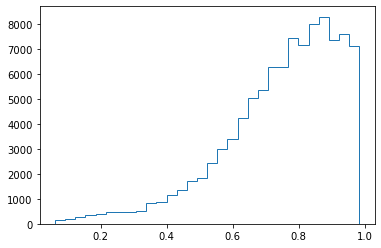

In [238]:
import random

thetas = [inverse_cdf_theta(random.random()) for i in range(100000)]
array = plt.hist(thetas, bins=30, histtype='step')

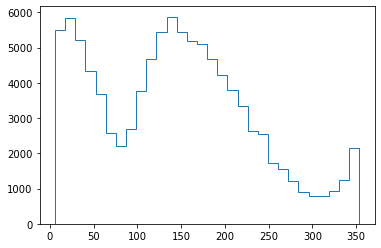

In [237]:
import random

phis = [inverse_cdf_phi(random.random()) for i in range(100000)]
array = plt.hist(phis, bins=30, histtype='step')

In [221]:
-80 % 180

100

In [222]:
data = DataAnalysis()
data.load_eventdf('data/path/new_events.csv')
data.load_clusterdf('data/path/clusters.csv')
data.filter_fit(3.5, 5) #(NRMSE, channels)

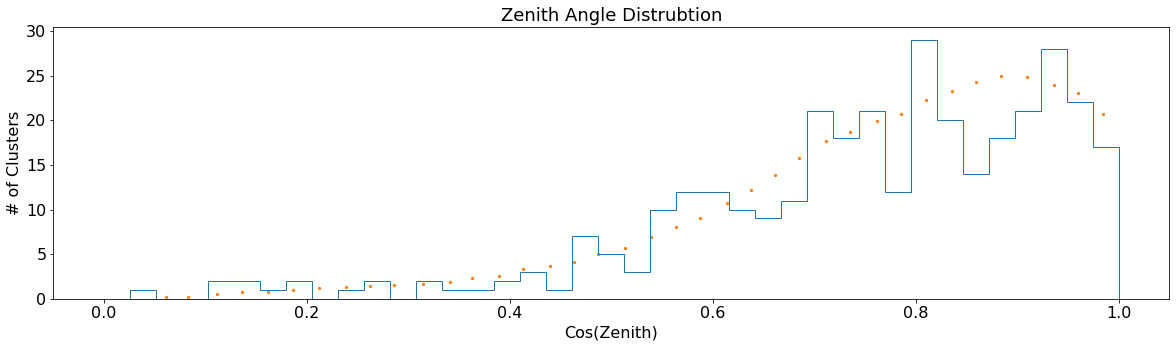

In [254]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], np.linspace(0,1,40), histtype='step')

thetas = [inverse_cdf_theta(random.random()) for i in range(341)]
#array = plt.hist(thetas, np.linspace(0,1,40), histtype='step')

plt.scatter(cos_theta[:,0], cos_theta[:,1]*10, s=5)

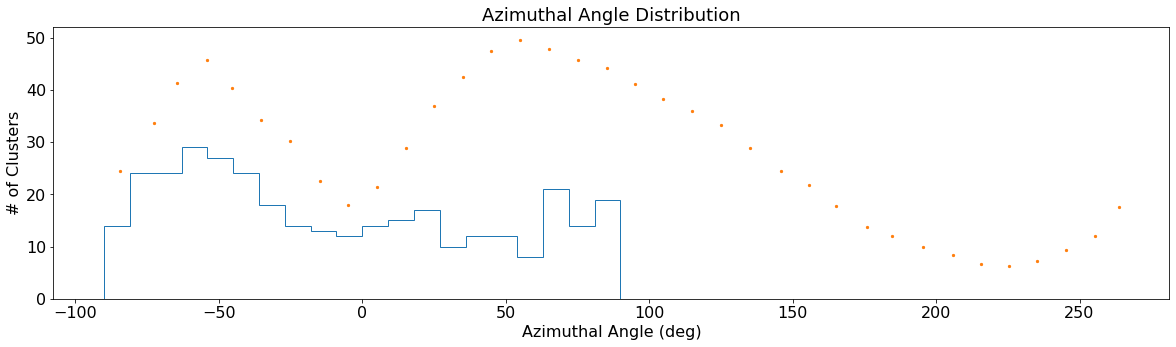

In [274]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (deg)',fontsize=16)

#plt.ylim(0,15)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Azimuth']], bins=20, histtype='step')

#phis = []
#for i in range(341):
#    phi = inverse_cdf_phi(random.random())
#    if phi > 180:
#        phi -= 180
#    phis.append(phi - 90)
#array = plt.hist(phis, bins=20, histtype='step')

plt.scatter(phi[:,0], phi[:,1]*10000, s=5)

In [268]:
phi

array([[5.72830000e+00, 2.44234638e-03],
       [1.74740000e+01, 3.37658448e-03],
       [2.54510000e+01, 4.12549998e-03],
       [3.59860000e+01, 4.57261701e-03],
       [4.47270000e+01, 4.03698274e-03],
       [5.47790000e+01, 3.42045632e-03],
       [6.49270000e+01, 3.01400639e-03],
       [7.53610000e+01, 2.25017225e-03],
       [8.50340000e+01, 1.78714201e-03],
       [9.50810000e+01, 2.14883604e-03],
       [1.05300000e+02, 2.89753052e-03],
       [1.15100000e+02, 3.70070565e-03],
       [1.25240000e+02, 4.25689448e-03],
       [1.34890000e+02, 4.74467861e-03],
       [1.44870000e+02, 4.95807035e-03],
       [1.55130000e+02, 4.79297078e-03],
       [1.65360000e+02, 4.56963328e-03],
       [1.75170000e+02, 4.41381642e-03],
       [1.84920000e+02, 4.10715559e-03],
       [1.94670000e+02, 3.83187913e-03],
       [2.04900000e+02, 3.59439656e-03],
       [2.15110000e+02, 3.32011469e-03],
       [2.25240000e+02, 2.89034748e-03],
       [2.35820000e+02, 2.44632468e-03],
       [2.455900